# Experiment 5: Test Linear and Circle Topologies generated

This experiment explores the differences between Linear and Circle CBNs, focus on attractor fields differences.
For the analysis, we generate a local network template and use it in every local network of the Linear and Circle CBNs.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
# df = pd.read_csv("outputs/exp5_aleatory_linear_circle_8_8_10000/data.csv")
# df = pd.read_csv("outputs/2_0_data_slow/exp5_aleatory_linear_circle_4_4_10000/data.csv")
# df = pd.read_csv("outputs/4_0_data_optimized/exp5_aleatory_linear_circle_9_9_10000/data.csv")
# df = pd.read_csv("outputs/4_0_data_optimized/exp5_aleatory_linear_circle_3_3_10000/data.csv")
df = pd.read_csv("outputs/4_0_data_optimized/exp5_aleatory_linear_circle_9_9_10000/data.csv")
# show the column names
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_local_attractors',
       'n_pair_attractors', 'n_attractor_fields', 'n_time_find_attractors',
       'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [14]:
# Fixed the Unnamed colum
# df = df.rename(columns={'Unnamed: 0': 'id_register'})
# df['id_register'] = df['id_register'] + 1

# Remove the last register without the two registers
# df = df.iloc[:-1]

In [15]:
df.head(10)

,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,1,9,5,4,2,2,26,31,10,0.627173,0.000417,0.001185
1,1,9,5,3,2,2,27,36,2,0.693924,0.000459,0.001893
2,2,9,5,4,2,2,51,135,19683,0.956925,0.000402,0.998320
3,2,9,5,3,2,2,54,162,19683,1.112864,0.000642,5.655108
4,3,9,5,4,2,2,26,23,2,0.823186,0.000390,0.000433
5,3,9,5,3,2,2,27,27,1,0.865540,0.000423,0.000555
6,4,9,5,4,2,2,17,15,1,0.735956,0.000495,0.000314
7,4,9,5,3,2,2,18,18,1,0.712957,0.000522,0.000405
8,5,9,5,4,2,2,25,44,256,0.766244,0.000386,0.012297
9,5,9,5,3,2,2,27,54,512,0.803991,0.000475,0.057921


## Explore the data from by CBN topology: Linear(4) and Circular(3)

### The mean of the number of local attractors

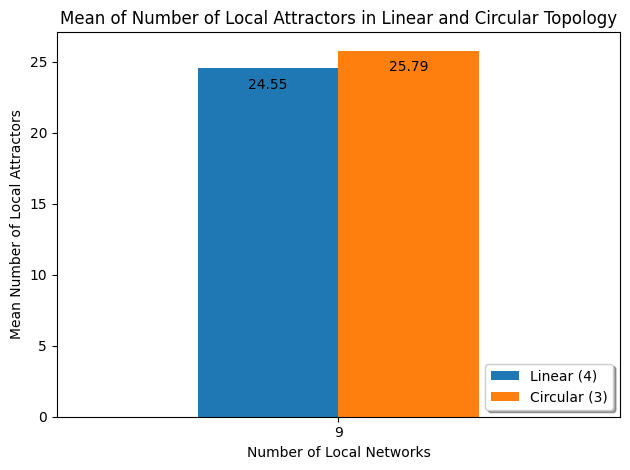

In [16]:
# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_local_attractors'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Local Attractors')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Local Attractors in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()


### The mean of the number of attractor pairs

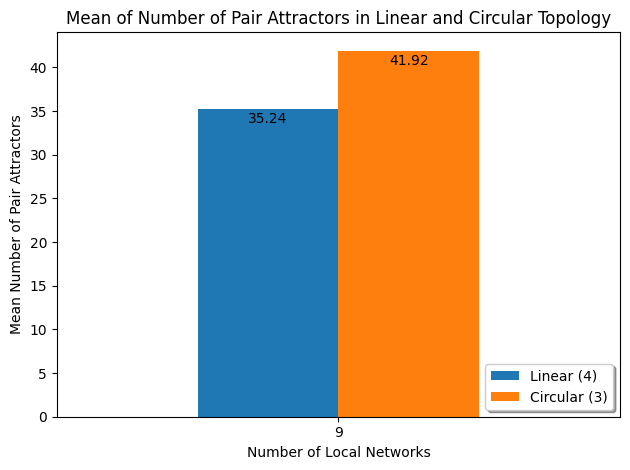

In [17]:
# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_pair_attractors'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Pair Attractors')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Number of Pair Attractors in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()

### The mean of the number of attractor fields

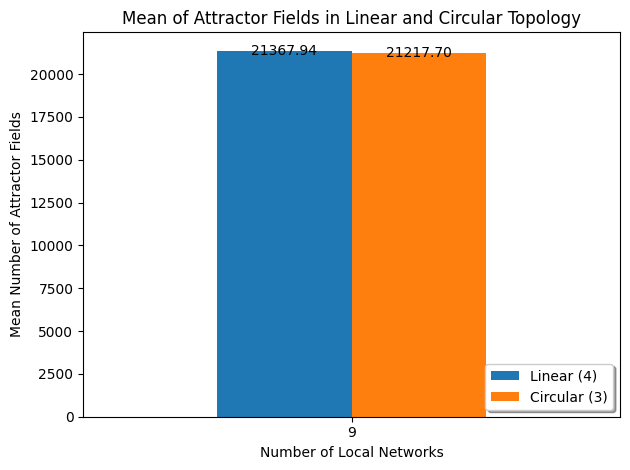

In [18]:
# Group by 'v_topology' and put the mean of 'n_local_attractors'
grouped_df = df.groupby(['n_local_networks', 'v_topology'])

# Get the order of the columns to display in the plot (sorted by v_topology in descending order)
column_order = sorted(df['v_topology'].unique(), reverse=True)

# Create the bar plot with different colors for each group and in the specified column order
ax = grouped_df['n_attractor_fields'].mean().unstack().loc[:, column_order].plot(kind='bar')

# Assign labels and title
ax.set_xlabel('Number of Local Networks')
ax.set_ylabel('Mean Number of Attractor Fields')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Mean of Attractor Fields in Linear and Circular Topology")

# Add labels with exact values inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height() - 1.15),
                ha='center', va='center', xytext=(0, 0), textcoords='offset points')

# Create a custom legend
legend_labels = {3: 'Circular', 4: 'Linear'}
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, [f'{legend_labels[int(label)]:s} ({label:s})' for label in labels],
          loc='lower right', bbox_to_anchor=(1, 0), fancybox=True, shadow=True)

# Show the plot
plt.tight_layout()
plt.show()


## Individual Analysis by number of local networks

### Violin Graphs

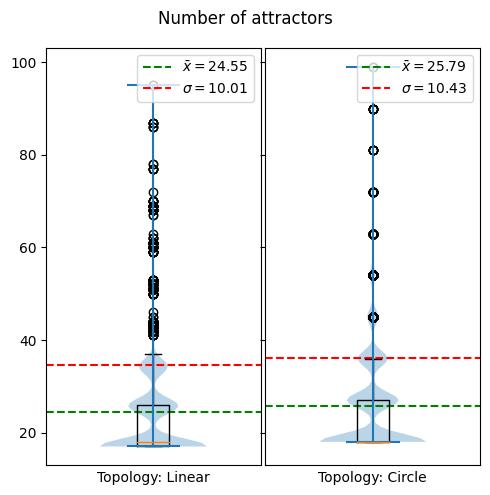

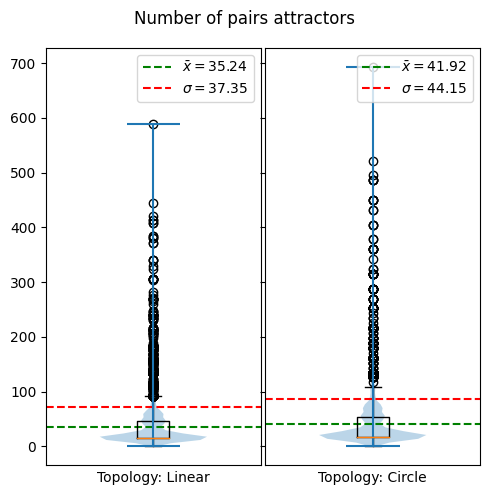

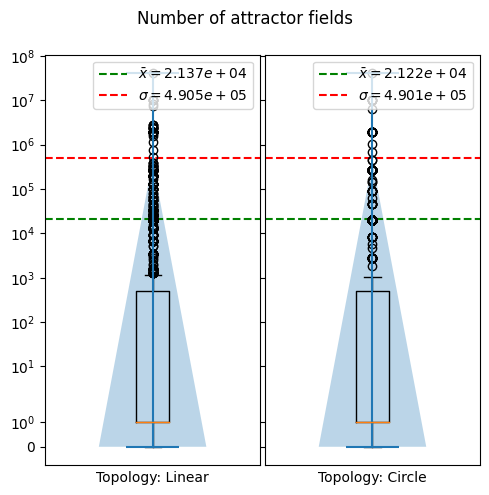

In [19]:
# Filter the graphs
# df_local_networks_n = df[df['n_local_networks'] == 9]
df_local_networks_n = df
# df_local_networks_n = df[df['n_local_networks'] == 4]
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_n['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_n.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_n.groupby("v_topology")

for key in df_local_networks_n.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True, figsize=(5, 5))
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)


### Top 20 Analysis

In [20]:
# filter by topology
df_v4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4]
df_v3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3]

# Select the 20 best df_v4 and df_v3 values for each metric
top_20_v4_attractors = df_v4.nlargest(20, 'n_local_attractors')
top_20_v3_attractors = df_v3.nlargest(20, 'n_local_attractors')

top_20_v4_pairs = df_v4.nlargest(20, 'n_pair_attractors')
top_20_v3_pairs = df_v3.nlargest(20, 'n_pair_attractors')

top_20_v4_fields = df_v4.nlargest(20, 'n_attractor_fields')
top_20_v3_fields = df_v3.nlargest(20, 'n_attractor_fields')


In [21]:
top_20_v4_fields[['i_sample','n_attractor_fields']]

,i_sample,n_attractor_fields
16350,8176,40353607
1606,804,10077696
4996,2499,10077696
16996,8499,10077696
18326,9164,10077696
19532,9767,10077696
14700,7351,8398080
16438,8220,7483882
940,471,2734375
3808,1905,2734375


In [22]:
top_20_v3_fields[['i_sample','n_attractor_fields']]

,i_sample,n_attractor_fields
16351,8176,40353607
1607,804,10077696
4997,2499,10077696
14701,7351,10077696
16997,8499,10077696
18327,9164,10077696
19533,9767,10077696
16439,8220,6367145
445,223,1953125
941,471,1953125


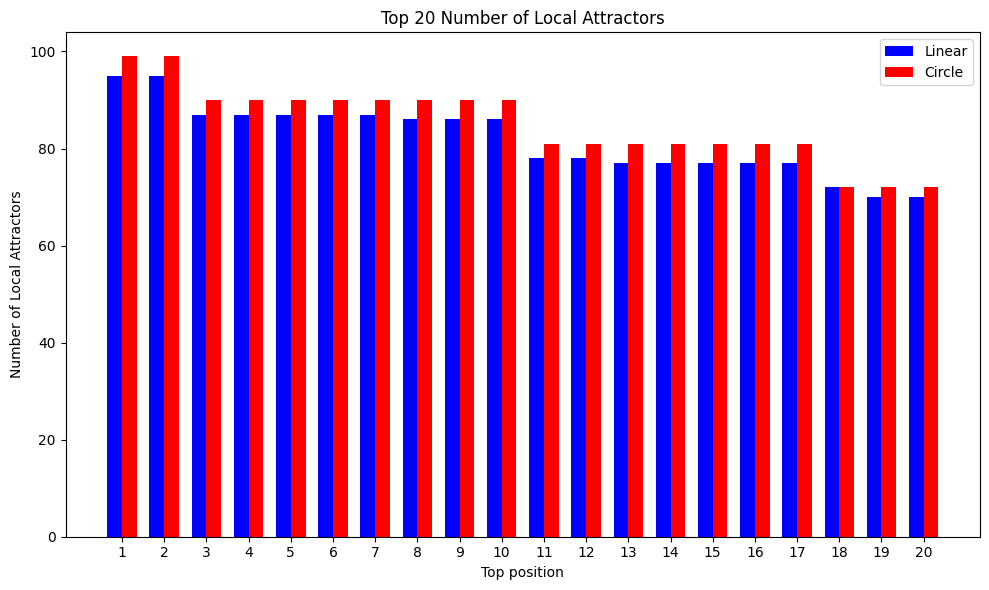

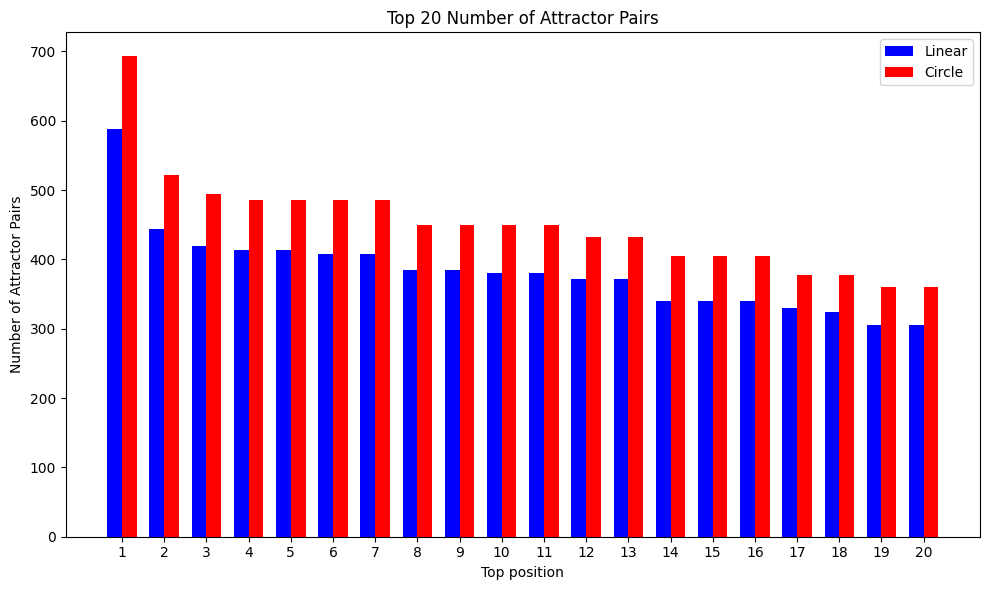

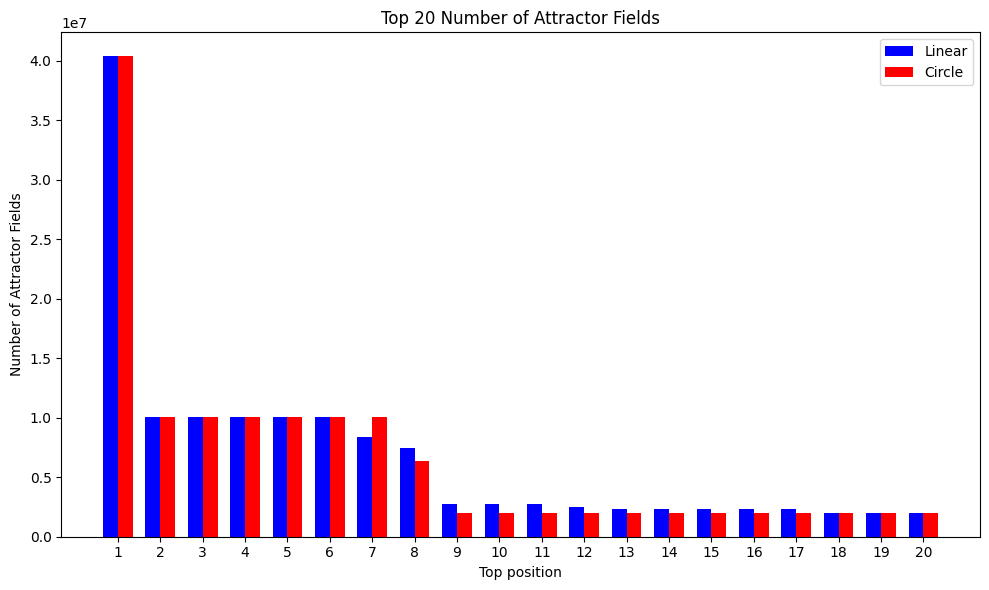

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Function to graph a specific metric
def plot_metric(df_linear, df_circle, metric, label_y, title):
    # Ordenar los DataFrames por la métrica (de mayor a menor)
    df_linear_sorted = df_linear.sort_values(metric, ascending=False)
    df_circle_sorted = df_circle.sort_values(metric, ascending=False)

    positions = np.arange(1, 21) 
    width = 0.35

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars for Linear
    ax.bar(positions - width/2, df_linear_sorted[metric], width, label='Linear', color='blue')
    # Create bars for Circle
    ax.bar(positions + width/2, df_circle_sorted[metric], width, label='Circle', color='red')

    ax.set_title(f'Top 20 {title}')
    ax.set_ylabel(f'Number of {label_y}')  # Label on y axis
    ax.set_xlabel('Top position')  # Label on x axis
    ax.set_xticks(positions)
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Graph for 'n_local_attractors
plot_metric(top_20_v4_attractors, top_20_v3_attractors, 'n_local_attractors', "Local Attractors", 'Number of Local Attractors')

# Chart for 'n_pair_attractors
plot_metric(top_20_v4_pairs, top_20_v3_pairs, 'n_pair_attractors', "Attractor Pairs", 'Number of Attractor Pairs')

# Graph for 'n_attractor_fields
plot_metric(top_20_v4_fields, top_20_v3_fields, 'n_attractor_fields', 'Attractor Fields', 'Number of Attractor Fields')


In [25]:
import pandas as pd
import numpy as np

# Filtrar los DataFrames para v_topology igual a 3 y 4
df_topology_3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])
df_topology_4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])

# Crear el DataFrame df_resume con las columnas deseadas
df_resume = pd.DataFrame({
    'linear_local_attractors': df_topology_4['n_local_attractors'],
    'circle_local_attractors': df_topology_3['n_local_attractors'],
    'linear_attractors_pairs': df_topology_4['n_pair_attractors'],
    'circle_attractors_pairs': df_topology_3['n_pair_attractors'],
    'linear_attractors_fields': df_topology_4['n_attractor_fields'],
    'circle_attractors_fields': df_topology_3['n_attractor_fields']
})

# Reemplazar valores infinitos por NaN y eliminar filas con NaN
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()

# Calcular y mostrar las estadísticas descriptivas de las columnas especificadas
stats = df_resume[['linear_attractors_fields', 'circle_attractors_fields']].describe()
print(stats)


       linear_attractors_fields  circle_attractors_fields
count              1.000000e+04              1.000000e+04
mean               2.136794e+04              2.121770e+04
std                4.905123e+05              4.901175e+05
min                0.000000e+00              0.000000e+00
25%                1.000000e+00              1.000000e+00
50%                1.000000e+00              1.000000e+00
75%                5.120000e+02              5.120000e+02
max                4.035361e+07              4.035361e+07


In [34]:
# Calcular y mostrar las estadísticas descriptivas de las columnas especificadas
stats = df_resume[['linear_attractors_fields', 'circle_attractors_fields']].describe()

# Formatear los valores con dos decimales
stats_formatted = stats.applymap(lambda x: f"{x:.2f}")

# Exportar las estadísticas descriptivas a una tabla LaTeX
texto_latex = stats_formatted.to_latex(
    index=True,       # Incluir los índices
    bold_rows=True,   # Hacer los índices en negrita
    column_format='lcc',  # Formato de las columnas (l: izquierda, c: centro, r: derecha)
    header=True,      # Incluir los encabezados de las columnas
    caption='Estadísticas Descriptivas de los Datos',  # Añadir una leyenda
    label='tab:my_label'  # Añadir una etiqueta
)

# Mostrar la tabla LaTeX
texto_latex_escaped = texto_latex.replace('%', r'\%')
print(texto_latex_escaped)


\begin{table}
\caption{Estadísticas Descriptivas de los Datos}
\label{tab:my_label}
\begin{tabular}{lcc}
\toprule
 & linear_attractors_fields & circle_attractors_fields \\
\midrule
\textbf{count} & 10000.00 & 10000.00 \\
\textbf{mean} & 21367.94 & 21217.70 \\
\textbf{std} & 490512.30 & 490117.47 \\
\textbf{min} & 0.00 & 0.00 \\
\textbf{25\%} & 1.00 & 1.00 \\
\textbf{50\%} & 1.00 & 1.00 \\
\textbf{75\%} & 512.00 & 512.00 \\
\textbf{max} & 40353607.00 & 40353607.00 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
# Calculate the difference between circle_attractors_fields and linear_attractors_fields
df_resume['difference'] = df_resume['circle_attractors_fields'] - df_resume['linear_attractors_fields']

# Filter cases where circle_attractors_fields is greater than linear_attractors_fields
df_superior = df_resume[df_resume['circle_attractors_fields'] > df_resume['linear_attractors_fields']]

# Calculate the mean of the difference
mean_difference1 = (df_superior['circle_attractors_fields'] - df_superior['linear_attractors_fields']).mean()
mean_difference2 = (df_superior['linear_attractors_fields'] - df_superior['circle_attractors_fields']).mean()

# Print the result
print(f'Mean of the difference where the number of attractor fields Circle is greater than Linear: {mean_difference1}')

# Count the number of times circle_attractors_fields is greater, equal, and less than linear_attractors_fields
count_greater = (df_resume['circle_attractors_fields'] > df_resume['linear_attractors_fields']).sum()
count_equal = (df_resume['circle_attractors_fields'] == df_resume['linear_attractors_fields']).sum()
count_less = (df_resume['circle_attractors_fields'] < df_resume['linear_attractors_fields']).sum()

# Print the results
print(f'Number of times circle_attractors_fields is greater than linear_attractors_fields: {count_greater}')
print(f'Number of times circle_attractors_fields is equal to linear_attractors_fields: {count_equal}')
print(f'Number of times circle_attractors_fields is less than linear_attractors_fields: {count_less}')


## IQR (Intervalo entre Quartis)

In [ ]:
# Intervalos Intercuartiles - QR
# https://docs.oracle.com/cloud/help/pt_BR/pbcs_common/PFUSU/insights_metrics_IQR.htm#PFUSU-GUID-CF37CAEA-730B-4346-801E-64612719FF6B

In [ ]:
# Calcular el límite superior del intervalo interquartil para linear_attractors_fields
linear_upper_limit = df_resume['linear_attractors_fields'].quantile(0.75) + 1.5*(df_resume['linear_attractors_fields'].quantile(0.75) - df_resume['linear_attractors_fields'].quantile(0.25))
linear_outliers = df_resume[df_resume['linear_attractors_fields'] > linear_upper_limit]['linear_attractors_fields']

# Calcular el límite superior del intervalo interquartil para circle_attractors_fields
circle_upper_limit = df_resume['circle_attractors_fields'].quantile(0.75) + 1.5*(df_resume['circle_attractors_fields'].quantile(0.75) - df_resume['circle_attractors_fields'].quantile(0.25))
circle_outliers = df_resume[df_resume['circle_attractors_fields'] > circle_upper_limit]['circle_attractors_fields']

# Contar la cantidad de valores superiores al límite superior del intervalo interquartil para linear_attractors_fields
linear_outliers_count = len(linear_outliers)

# Contar la cantidad de valores superiores al límite superior del intervalo interquartil para circle_attractors_fields
circle_outliers_count = len(circle_outliers)

print("Cantidad de valores superiores al límite superior del intervalo interquartil para linear_attractors_fields:", linear_outliers_count)
print("Cantidad de valores superiores al límite superior del intervalo interquartil para circle_attractors_fields:", circle_outliers_count)


### Linear

In [ ]:
# Utilizar 'i_sample' como índice para linear_outliers
indices_linear = linear_outliers.index.get_level_values('i_sample')

# Graficar valores superiores al límite superior del intervalo interquartil para linear_attractors_fields
plt.figure(figsize=(10, 6))
plt.scatter(indices_linear, linear_outliers, color='blue', alpha=0.7, label=f'Valores ploteados: {len(linear_outliers)}')
plt.title('Número de campos attractores vs i_sample para linear_attractors_fields')
plt.xlabel('i_sample')
plt.ylabel('Número de campos attractores')
plt.legend()
plt.grid(True)
plt.show()


### Circular

In [ ]:
# Crear un rango de índices para los datos de circle_outliers
indices_circle = circle_outliers.index.get_level_values('i_sample')

# Graficar valores superiores al límite superior del intervalo interquartil para circle_attractors_fields
plt.figure(figsize=(10, 6))
plt.scatter(indices_circle, circle_outliers, color='green', alpha=0.7, label=f'Valores ploteados: {len(circle_outliers)}')
plt.title('Número de campos attractores vs i_sample para circle_attractors_fields')
plt.xlabel('i_sample')
plt.ylabel('Número de campos attractores')
plt.legend()
plt.grid(True)
plt.show()


## Dispersion Graph

### Linear

In [ ]:
# Create a scatter plot
plt.scatter(df_topology_4['n_time_find_fields'], df_topology_4['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

### Circular

In [ ]:
# Create a scatter plot for df_topology_3
plt.scatter(df_topology_3['n_time_find_fields'], df_topology_3['n_attractor_fields'], color='red', label='Topology 3')

plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot for Topology 3')
plt.show()

## Power-Law Distribution

In [ ]:
# Histograma dividido de 0 a 30 , 30 a 50.
# https://economicsfromthetopdown.com/2019/04/25/visualizing-power-law-distributions/
# escala log log

### Linear

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el histograma de frecuencias
histogram = df_topology_4['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields (agrupado automáticamente)')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el histograma de frecuencias
histogram = df_topology_4['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.yscale('log')  # Aplicar escala logarítmica al eje y
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields (agrupado automáticamente)')
plt.xlabel('Valores')
plt.ylabel('Frecuencia (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


### Circular

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el histograma de frecuencias
histogram = df_topology_3['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields (agrupado automáticamente)')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el histograma de frecuencias
histogram = df_topology_3['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.yscale('log')  # Aplicar escala logarítmica al eje y
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields (agrupado automáticamente)')
plt.xlabel('Valores')
plt.ylabel('Frecuencia (log scale)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()
